<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_algebra/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy
from sympy import  Symbol, symbols, S, Point, Line, Plane, Point3D,\
Matrix, Eq, latex
from IPython.display import display, Latex
from google.colab import files
import pandas as pd

# Практическое занятие 6
# Компьютерный практикум по алгебре на Python
##  Прямые и плоскости в пространстве. Geometry.
### Задание 1.
Задать точки $A(1, 2, 3)$,
$B(1, 10, 3)$,
$C(-3, 2, 1)$,
$D(7, 2, 1)$ как матрицы-столбцы, вычислить и вывести на экран скалярное произведение векторов $AB$ и $CD$, их длины, косинус угла между векторами и угол в радианах и градусах.

In [ ]:
A = Matrix([1, 2, 3]).T
B = Matrix([1, 10, 3]).T
C = Matrix([-3, 2, 1]).T
D = Matrix([7, 2, 1]).T

AB = B - A
CD = D - C

AB_len = sympy.sqrt(AB.dot(AB))
CD_len = sympy.sqrt(CD.dot(CD))
display(Latex(f"|AB| = {latex(AB_len)}"))
display(Latex(f"|CD| = {latex(CD_len)}"))

cos_phi = AB.dot(CD) / AB_len / CD_len
display(Latex(f"\\cos\\varphi = {latex(cos_phi)}"))

phi = sympy.acos(cos_phi)
display(Latex(f"\\varphi = {latex(phi)} \\approx {round(phi, 4)}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Точки из Задания 1 представить в виде Point из Geometry, составить прямые $AB$,  $BC$, $CD$ и  $AD$,
найти с помощью  **angle_between** и  **smallest_angle_between** угол между прямыми $AB$ и  $CD$, а также между $BC$ и  $AD$ (в радианах).

In [ ]:
A = Point3D(1, 2, 3)
B = Point3D(1, 10, 3)
C = Point3D(-3, 2, 1)
D = Point3D(7, 2, 1)

AB = Line(A, B)
CD = Line(C, D)
BC = Line(B, C)
AD = Line(A, D)

display(Latex(f"\\varphi_1 = {latex(AB.angle_between(CD))}"))
display(Latex(f"\\varphi_2 = {latex(AB.smallest_angle_between(CD))}"))
display(Latex(f"\\theta_1 = {latex(BC.angle_between(AD))}"))
display(Latex(f"\\theta_2 = {latex(BC.smallest_angle_between(AD))}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Найти и вывести на экран угол между прямой, проходящей через точки $A(-1, 3, 1)$ и $B(3, 7, 1)$ и плоскостью, в которой лежат точки
$K(4, 3, 0)$, $M(2, 4, -2)$ и $N(6, 8, -2)$.
Проверить, лежат ли точки  $A$ и $B$ в одной плоскости с какими-то двумя точками из $K$, $M$ и $N$.

Вывести на экран сообщение "В одной плоскости лежат точки (имена точек)" или "Никакие точки не лежат в одной плоскости".

In [ ]:
A = Point3D(-1, 3, 1)
B = Point3D(3, 7, 1)
K = Point3D(4, 3, 0)
M = Point3D(2, 4, -2)
N = Point3D(6, 8, -2)

AB = Line(A, B)
KMN = Plane(K, M, N)

display(Latex(f"\\varphi = {latex(KMN.angle_between(AB))}"))

points1 = [A, B]
names1 = ["A", "B"]

points2 = [K, M, N]
names2 = ["K", "M", "N"]

f = False

for p1, n1 in zip(points1, names1):
  for p2, n2 in zip(points2, names2):
    for p3, n3 in zip(points2, names2):
      if n2 == n3:
        continue

      if Point3D.are_coplanar(p1, p2, p3):
        display(f"В одной плоскости лежат точки {n1}, {n2}, {n3}")
        f = True

if not f:
  display("Никакие точки не лежат в одной плоскости")

<IPython.core.display.Latex object>

'В одной плоскости лежат точки A, K, M'

'В одной плоскости лежат точки A, K, N'

'В одной плоскости лежат точки A, M, K'

'В одной плоскости лежат точки A, M, N'

'В одной плоскости лежат точки A, N, K'

'В одной плоскости лежат точки A, N, M'

'В одной плоскости лежат точки B, K, M'

'В одной плоскости лежат точки B, K, N'

'В одной плоскости лежат точки B, M, K'

'В одной плоскости лежат точки B, M, N'

'В одной плоскости лежат точки B, N, K'

'В одной плоскости лежат точки B, N, M'

###  Задание 4.
Даны точки $P(-1, 2, -4)$ $Q(12, -2, 20)$ $R(0, 3, -6)$, $D(-16, 53, 11)$.

Определить, перпендикулярна ли плоскость $PQR$ прямой $DP$, $DQ$ или $DR$. Вывести на экран уравнения плоскости  $PQR$ и перпендикулярной ей прямой.

In [ ]:
P = Point3D(-1, 2, -4)
Q = Point3D(12, -2, 20)
R = Point3D(0, 3, -6)
D = Point3D(-16, 53, 11)

PQR = Plane(P, Q, R)
DP = Line(D, P)
DQ = Line(D, Q)
DR = Line(D, R)

perp_line = None

if PQR.is_perpendicular(DP):
  display(f"PQR перпендикулярна DP")
  perp_line = DP
if PQR.is_perpendicular(DQ):
  display(f"PQR перпендикулярна DQ")
  perp_line = DQ
if PQR.is_perpendicular(DR):
  display(f"PQR перпендикулярна DR")
  perp_line = DR

display(Eq(PQR.equation(), 0))
display(perp_line.equation())

'PQR перпендикулярна DR'

Eq(-16*x + 50*y + 17*z - 48, 0)

(25*x + 8*y - 24, 17*x + 16*z + 96)

###  Задание 5.
Прочитать из файла 'sem_6_task_5.xlsx' координаты точек $P_1$, $P_2$, ..., $P_9$. Вывести уравнения плоскостей $P_1 P_2 P_3$, $P_4 P_5 P_6$ и $P_7 P_8 P_9$ в цикле.

In [4]:
uploaded = files.upload()

Saving sem_6_task_5.xlsx to sem_6_task_5.xlsx


In [ ]:
points_table = pd.read_excel('sem_6_task_5.xlsx', index_col=0)
coords = points_table.to_numpy()

points = [Point3D(p) for p in coords]

for i in range(0, 9, 3):
  P1, P2, P3 = points[i:i+3]
  plane = Plane(P1, P2, P3)

  display(Eq(plane.equation(), 0))

Eq(49*x + 74*y - 32*z - 377, 0)

Eq(27*x + 58*y - 24*z, 0)

Eq(-28*x + 26*y + 4*z + 190, 0)

###  Задание 6*.
Для каждой из плоскостей $P_1 P_2 P_3$, $P_4 P_5 P_6$ и $P_7 P_8 P_9$ построить параллельную плоскость, проходящую через начало координат (в цикле), вывести на экран уравнение этой плоскости.

Вывести на экран векторы нормали плоскостей, перпендикулярных плоскости $P_1 P_2 P_3$ и проходящих через точки $P_kP_{k+1}$, $k=4,...8$ (в цикле)

In [ ]:
points_table = pd.read_excel('sem_6_task_5.xlsx', index_col=0)
coords = points_table.to_numpy()

points = [Point3D(p) for p in coords]

P0 = Point3D(0, 0, 0)

for i in range(0, 9, 3):
  P1, P2, P3 = points[i:i+3]
  par_plane = Plane(P1, P2, P3).parallel_plane(P0)

  display(Eq(par_plane.equation(), 0))

for i in range(0, 9, 3):
  P1, P2, P3 = points[i:i+3]

  for k in range(4, 8):
    P4, P5 = points[k:k+2]
    perp_plane = Plane(P1, P2, P3).perpendicular_plane(P4, P5)
    norm = perp_plane.normal_vector

    display(norm)


Eq(49*x + 74*y - 32*z, 0)

Eq(27*x + 58*y - 24*z, 0)

Eq(-28*x + 26*y + 4*z, 0)

(-666, 697, 592)

(1090, -637, 196)

(-518, 375, 74)

(242, -149, 26)

(-522, 435, 464)

(850, -351, 108)

(-406, 213, 58)

(194, -63, 66)

(-234, -284, 208)

(322, 364, -112)

(-182, -200, 26)

(146, 128, 190)

###  Задание 7*.
Построить прямую $l_1$, перпендикулярную плоскости $P_1 P_2 P_3$, проходящую через $P_9$, и прямую $l_2$, параллельную $P_8P_9$, проходящую через $P_1$. Вывести на экран для каждой прямой $l_1$ и $l_2$ точку на прямой, направляющий вектор прямой и параметрические уравнения прямой.

In [15]:
points_table = pd.read_excel('sem_6_task_5.xlsx', index_col=0)
coords = points_table.to_numpy()

points = [Point3D(p) for p in coords]
x, y, z = symbols("x y z")
t = symbols("t")

plane = Plane(points[0], points[1], points[2])
line = plane.perpendicular_line(points[8])

point = line.p1
dir = line.direction_ratio
eq = [
    Eq(x, point[0] + t * dir[0]),
    Eq(y, point[1] + t * dir[1]),
    Eq(z, point[2] + t * dir[2]),
]

display(point, tuple(dir), *eq)


line = Line(points[7], points[8])
line = line.parallel_line(points[0])

point = line.p1
dir = line.direction_ratio
eq = [
    Eq(x, point[0] + t * dir[0]),
    Eq(y, point[1] + t * dir[1]),
    Eq(z, point[2] + t * dir[2]),
]

display(point, tuple(dir), *eq)


Point3D(10, 3, 3)

(49, 74, -32)

Eq(x, 49*t + 10)

Eq(y, 74*t + 3)

Eq(z, 3 - 32*t)

Point3D(11, 3, 12)

(3, 4, -5)

Eq(x, 3*t + 11)

Eq(y, 4*t + 3)

Eq(z, 12 - 5*t)

### Индивидуальное задание
Даны точки в пространстве
$A$, $B$, $C$ и
$M$.

Найти угол между прямой $AB$ и плоскостью $CDM$, угол между $AC$ и $CM$, угол между плоскостями $ABC$ и $CDM$.

Составить уравнение:

a) плоскости, параллельной $ABC$ и проходящей через $M$,

b) плоскости, перпендикулярной $ABC$ и проходящей через $A$ и $M$,

c) прямой (параметрическое!), перпендикулярной $ABC$ и проходящей через $C$.
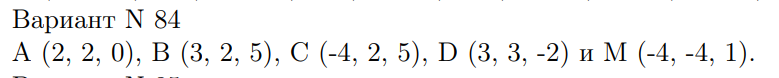

In [24]:
A = Point3D(2, 2, 0)
B = Point3D(3, 2, 5)
C = Point3D(-4, 2, 5)
D = Point3D(3, 3, -2)
M = Point3D(-4, -4, 1)

AB = Line(A, B)
AC = Line(A, C)
CM = Line(C, M)

ABC = Plane(A, B, C)
CDM = Plane(C, D, M)

display(Latex(f"\\varphi_1 = {latex(CDM.angle_between(AB))}"))
display(Latex(f"\\varphi_2 = {latex(AC.angle_between(CM))}"))
display(Latex(f"\\varphi_3 = {latex(ABC.angle_between(CDM))}"))

# a
plane = ABC.parallel_plane(M)
display(plane.equation())

# b
plane = ABC.perpendicular_plane(A, M)
display(plane.equation())

# c
line = ABC.perpendicular_line(C)
point = line.p1
dir = line.direction_ratio

x, y, z, t = symbols("x y z t")
eq = [
    Eq(x, point[0] + t * dir[0]),
    Eq(y, point[1] + t * dir[1]),
    Eq(z, point[2] + t * dir[2]),
]
display(*eq)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

-35*y - 140

35*x + 210*z - 70

Eq(x, -4)

Eq(y, 2 - 35*t)

Eq(z, 5)